In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap
from scipy.stats import gmean
import sarchl
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
dcu_data = pd.read_csv('./DCUL1freq.csv',index_col=0)
print(dcu_data.columns)
dcu_data.columns = ['Benchmark','P3@1000MHz','P3@1845MHz']
dcu_data['P3@1845MHz'] = dcu_data['P3@1000MHz']/dcu_data['P3@1845MHz']
dcu_data['P3@1000MHz'] = dcu_data['P3@1000MHz']/dcu_data['P3@1000MHz']


dcu_data = dcu_data.melt(id_vars=['Benchmark'],value_vars=['P3@1000MHz','P3@1845MHz'])
dcu_data.columns=['Benchmark','GPU','Speedup']

Index(['Benchmark', 'P2DCUL1', 'P2DCUL1freq'], dtype='object')


In [9]:
dcu_data

Benchmark         GPU   Speedup
0       ATAX  P3@1000MHz  1.000000
1       BICG  P3@1000MHz  1.000000
2         BS  P3@1000MHz  1.000000
3        FIR  P3@1000MHz  1.000000
4        FLW  P3@1000MHz  1.000000
5        FWT  P3@1000MHz  1.000000
6         KM  P3@1000MHz  1.000000
7         MT  P3@1000MHz  1.000000
8         PR  P3@1000MHz  1.000000
9       ReLU  P3@1000MHz  1.000000
10      SPMV  P3@1000MHz  1.000000
11      ATAX  P3@1845MHz  1.357392
12      BICG  P3@1845MHz  1.539371
13        BS  P3@1845MHz  1.585247
14       FIR  P3@1845MHz  1.511866
15       FLW  P3@1845MHz  1.637008
16       FWT  P3@1845MHz  1.361890
17        KM  P3@1845MHz  1.258144
18        MT  P3@1845MHz  1.336292
19        PR  P3@1845MHz  1.844117
20      ReLU  P3@1845MHz  1.840675
21      SPMV  P3@1845MHz  1.338560

In [10]:
palt = sarchl.sequential_palette(2)
palt

['#02090a', '#3bb1d1']

In [11]:
times=dcu_data.loc[dcu_data['GPU']=='P3@1845MHz']['Speedup']
gomean = pd.DataFrame({'mean':['Geo-Mean'],'Speedup':[gmean(times)]})
print(gmean(times))

1.4980806196685184


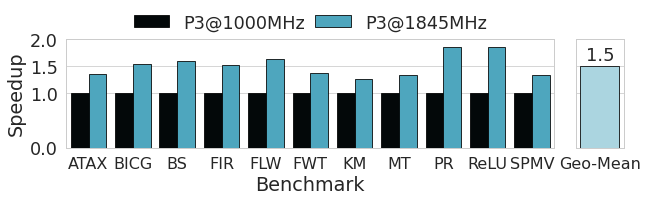

In [12]:
fig, ax = plt.subplots(1,2,figsize=(10, 2),gridspec_kw={'width_ratios': [10, 1]},sharey=True)
sns.barplot(data=dcu_data, 
            x='Benchmark', hue='GPU', y='Speedup', 
            palette=palt, ec='k',
            ax=ax[0])
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.15), loc=10, ncol=2)
ax[0].set_ylim(0, 2)
ax[0].set_yticks([0, 1.0, 1.5,2])
ax[0].tick_params(axis='x', which='major', labelsize=16)
g=sns.barplot(data=gomean,x='mean',y='Speedup',palette=['#a2dae9'],ec='k',ax=ax[1])
g.set(xlabel=None)
g.set(ylabel=None)
plt.subplots_adjust(wspace=0.08)
ax[1].text(0, 1.7, 1.5,  horizontalalignment='center', verticalalignment='center',fontsize=18)
ax[1].tick_params(axis='x', which='major', labelsize=16)
plt.savefig('DCUL1freq.pdf', bbox_inches='tight')
plt.show()
